<a href="https://colab.research.google.com/github/k-u-s-h-a-g-r-a-k-e-d-i-a/AI-ML-Basics/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('/content/netflix_revenue_updated.csv')
print("DATASET IMPORTED")

Saving netflix_revenue_updated.csv to netflix_revenue_updated (1).csv
DATASET IMPORTED


In [ ]:
#EDA is a technique used to analyse and summarize data sets using statistical and visualization methods to undestand patterns,trends and anomalies.
#It helps in data pre processing and selecting suitable machine learning models

In [ ]:
a,b = df.shape
print("Number of rows:",a)
print("Number of columns",b)

Number of rows: 21
Number of columns 15


In [ ]:
c = df.info()
d = df.describe()
print("INFO OF THE DATASET")
print(c)
print("DESCRIPTION OF THE DATASET")
print(d)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            21 non-null     object 
 1   Global Revenue                  21 non-null     int64  
 2   UCAN Streaming Revenue          21 non-null     int64  
 3   EMEA Streaming Revenue          21 non-null     int64  
 4   LATM Streaming Revenue          21 non-null     int64  
 5   APAC Streaming Revenue          21 non-null     int64  
 6   UCAN Members                    21 non-null     int64  
 7   EMEA  Members                   21 non-null     int64  
 8   LATM Members                    21 non-null     int64  
 9   APAC Members                    21 non-null     int64  
 10  UCAN ARPU                       21 non-null     float64
 11  EMEA ARPU                       21 non-null     float64
 12  LATM  ARPU                      21 non

In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Date                              0
Global Revenue                    0
UCAN Streaming Revenue            0
EMEA Streaming Revenue            0
LATM Streaming Revenue            0
APAC Streaming Revenue            0
UCAN Members                      0
EMEA  Members                     0
LATM Members                      0
APAC Members                      0
UCAN ARPU                         0
EMEA ARPU                         0
LATM  ARPU                        0
APAC  ARPU                        0
Netflix Streaming Memberships     0
dtype: int64


### Check for Duplicate Rows

Duplicate rows can indicate data entry errors or issues during data collection. We'll check if there are any exact duplicate rows in the DataFrame.

In [ ]:
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("\nFirst 5 duplicate rows (if any):")
    display(df[df.duplicated()].head())
    # If you want to drop duplicates, you can use:
    # df.drop_duplicates(inplace=True)
    # print(f"\nDataFrame shape after dropping duplicates: {df.shape}")


Number of duplicate rows: 0


### Check Unique Values in Categorical/Object Columns

For columns that are categorical or of object type (like 'Date'), checking unique values can help identify inconsistencies such as typos or variations in how data is entered. Even if 'Date' has been properly parsed, it's good practice to check if it's treated as an object initially.

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values for column '{col}':")
    print(df[col].unique())
    print(f"Number of unique values: {df[col].nunique()}")



Unique values for column 'Date':
['31-03-2019' '30-06-2019' '30-09-2019' '31-12-2019' '31-03-2020'
 '30-06-2020' '30-09-2020' '31-12-2020' '31-03-2021' '30-06-2021'
 '30-09-2021' '31-12-2021' '31-03-2022' '30-06-2022' '30-09-2022'
 '31-12-2022' '31-03-2023' '30-06-2023' '30-09-2023' '31-12-2023'
 '31-03-2024']
Number of unique values: 21


### Visualize Data Distributions (Histograms and Boxplots)

We'll use histograms to observe the shape of the distribution of numerical variables, and boxplots to identify potential outliers and understand the spread of the data.

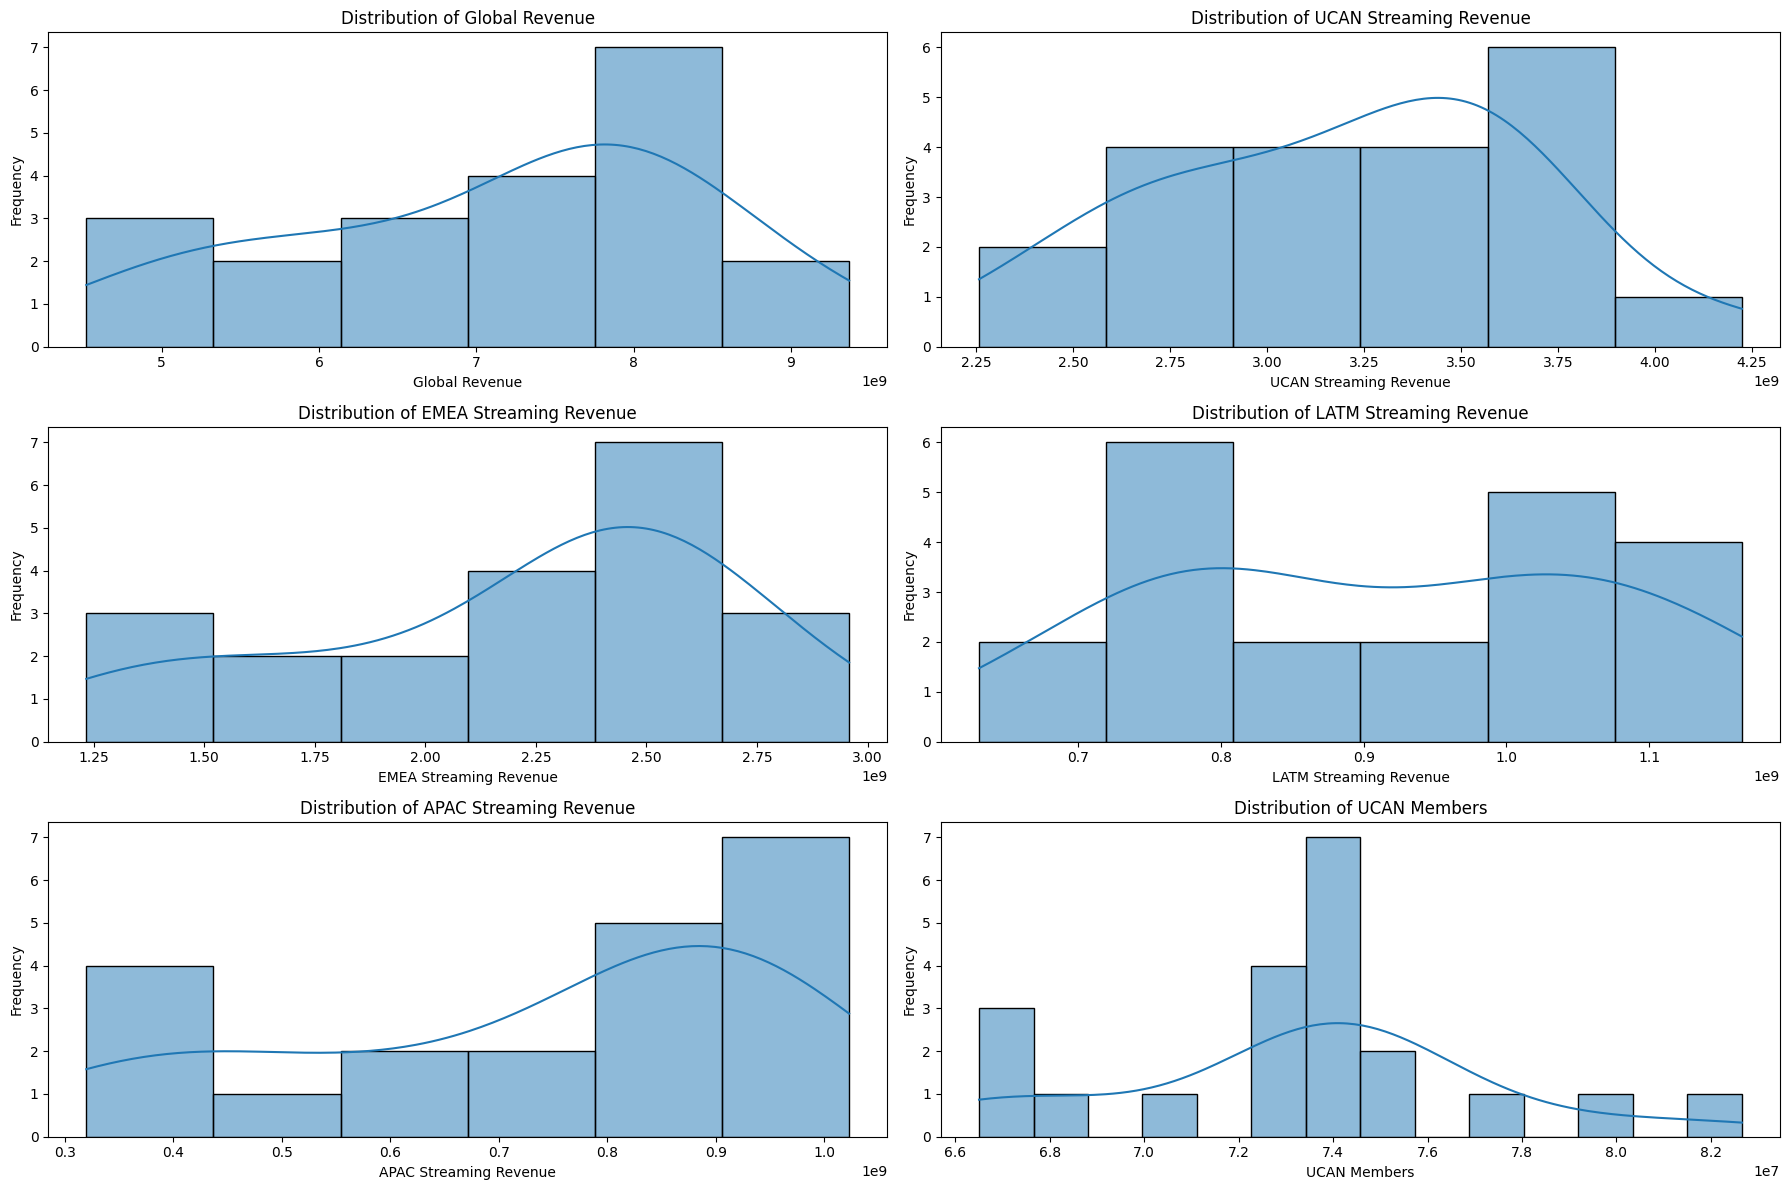

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# If 'Netflix Streaming Memberships' is a sum of other member counts, we might want to exclude it for individual distribution plots
# Example: if 'Netflix Streaming Memberships' is a derived column
if 'Netflix Streaming Memberships' in numerical_cols:
    numerical_cols.remove('Netflix Streaming Memberships')


plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols[:6]): # Limiting to first 6 for readability, can adjust
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


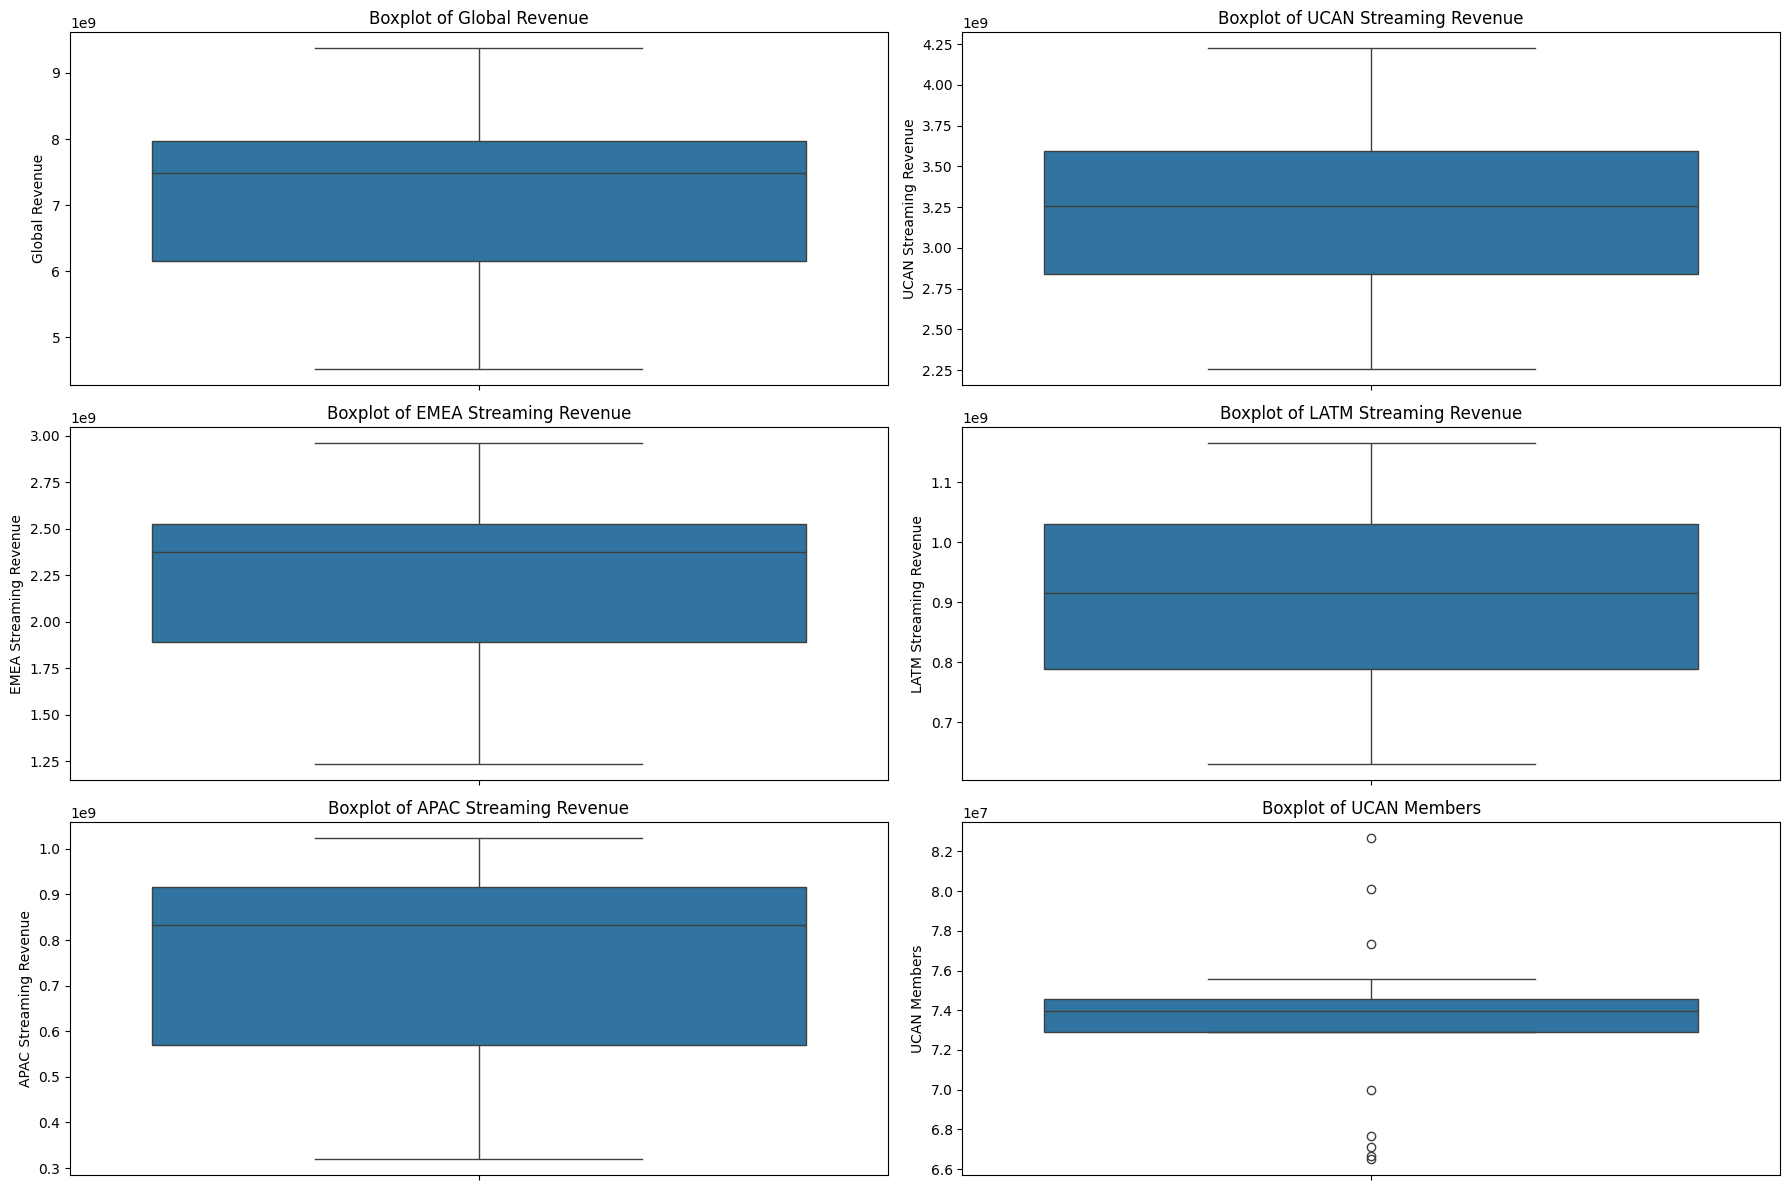

In [ ]:
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_cols[:6]): # Limiting to first 6 for readability, can adjust
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


### Correlation Analysis

Correlation analysis helps us understand the linear relationships between pairs of numerical variables. A correlation matrix visualizes these relationships, with values ranging from -1 (strong negative correlation) to +1 (strong positive correlation).

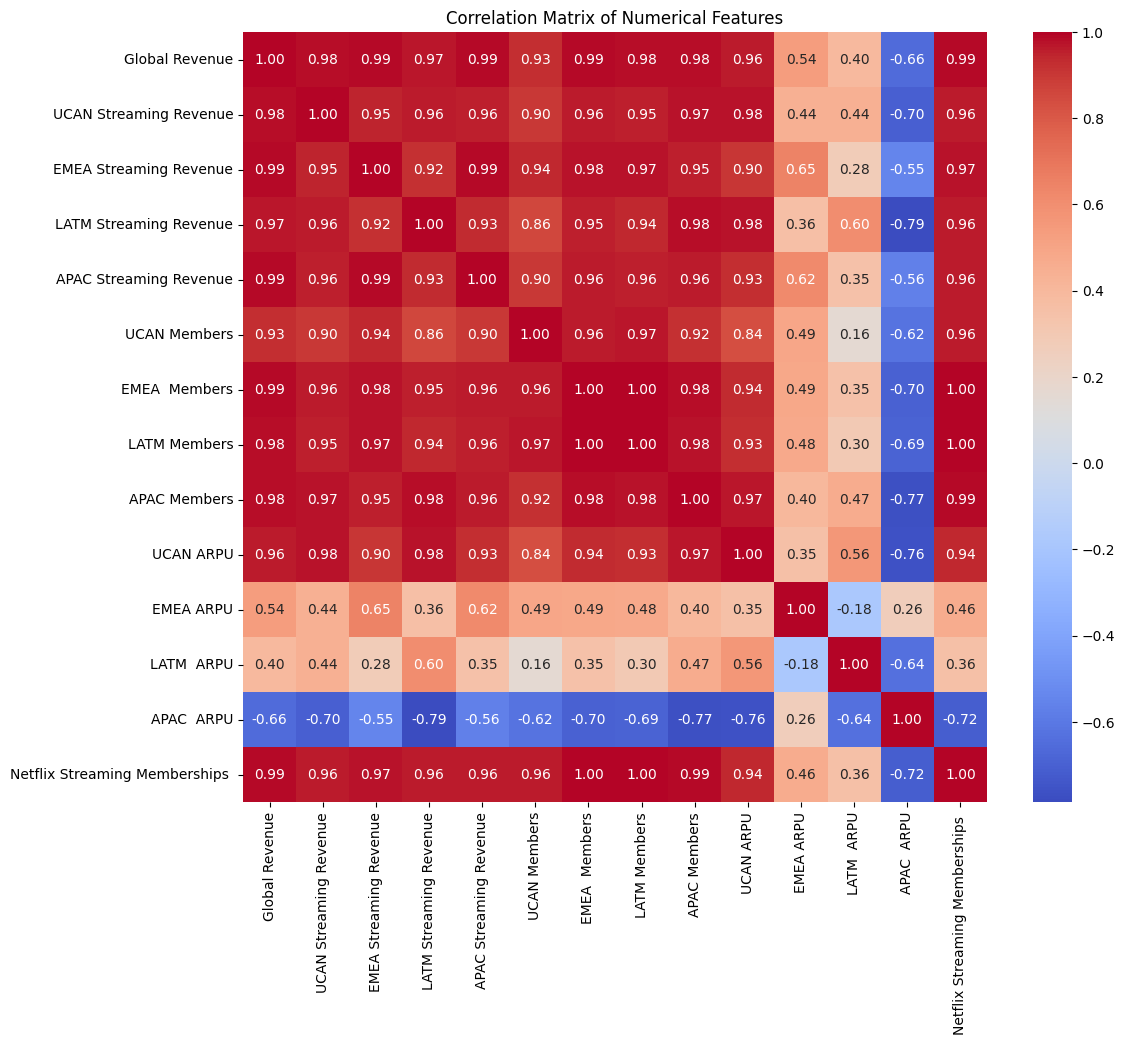

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### Scatter Plots for Feature Relationships

Scatter plots are useful for visualizing the relationship between two numerical variables and can reveal patterns, clusters, or outliers that might not be evident from correlation coefficients alone.

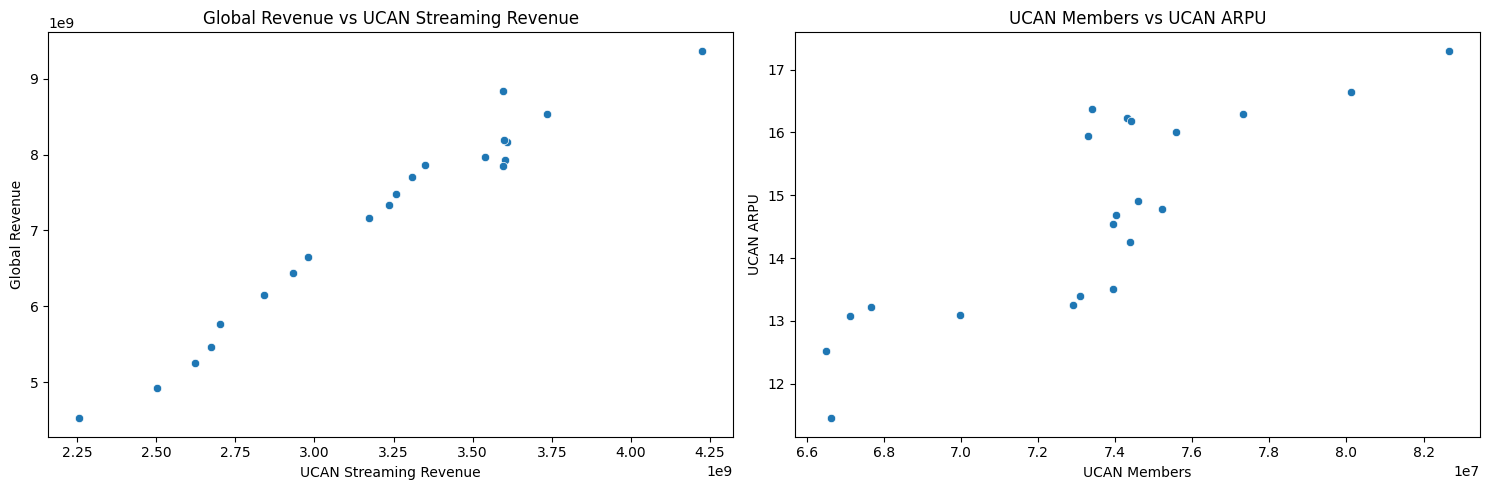

In [ ]:
plt.figure(figsize=(15, 5))

# Example 1: Global Revenue vs UCAN Streaming Revenue
plt.subplot(1, 2, 1)
sns.scatterplot(x='UCAN Streaming Revenue', y='Global Revenue', data=df)
plt.title('Global Revenue vs UCAN Streaming Revenue')

# Example 2: UCAN Members vs UCAN ARPU (Average Revenue Per User)
plt.subplot(1, 2, 2)
sns.scatterplot(x='UCAN Members', y='UCAN ARPU', data=df)
plt.title('UCAN Members vs UCAN ARPU')

plt.tight_layout()
plt.show()

# You can add more scatter plots for other interesting relationships
# For example:
# plt.figure(figsize=(7, 5))
# sns.scatterplot(x='EMEA Members', y='EMEA Streaming Revenue', data=df)
# plt.title('EMEA Members vs EMEA Streaming Revenue')
# plt.show()
